In [1]:
from Binaries import *
Th1 = HardwareClassifier(["th1"])
ToT = HardwareClassifier(["tot"])
ToTd = HardwareClassifier(["totd"])

In [4]:
vem_compatibility = np.array([163.235 for _ in range(3)])
th1_fuckups = []

EventsLTP = EventGenerator("/cr/tempdata01/filip/QGSJET-II/LTP/extracted/", apply_downsampling = True, q_peak = vem_compatibility, split = 1, real_background = False, sigma = 0)

for i, batch in enumerate(EventsLTP):
    print(f"{EventsLTP.files[i]}, {i}/{len(EventsLTP)}                       ", end = "\r")

    for trace in batch:

        is_th1, is_tot, is_totd = trace.n_muons, trace.n_electrons, trace.n_photons

        if is_th1: 
            if not Th1(trace):
                th1_fuckups.append([trace.StationID, trace.EventFile])

KeyboardInterrupt: 

# Issue with random phase?

In [5]:
total_fuckups = []

for ID, file in th1_fuckups:

    signal_data = SignalBatch(file)

    for station in signal_data:
        if station[0][0] != ID: continue

        baseline = EventsLTP.build_baseline()

        for i in range(3):
            VEMTrace = Trace(baseline, station, EventsLTP.trace_options, file, random_phase = i)

            # plt.figure()
            # plt.ylim(-0.5,1.9)
            # VEMTrace.__plot__()
            # plt.xlim(220, 300)

            # plt.axhline(1.75, c = "gray", ls = "--")

            if Th1(VEMTrace):
                break

        else:
            total_fuckups.append([ID, file])

In [6]:
print(len(th1_fuckups))
print(len(total_fuckups))

111
20


5397 /cr/tempdata01/filip/QGSJET-II/LTP/extracted/DAT769322_000001.csv


StopIteration: 

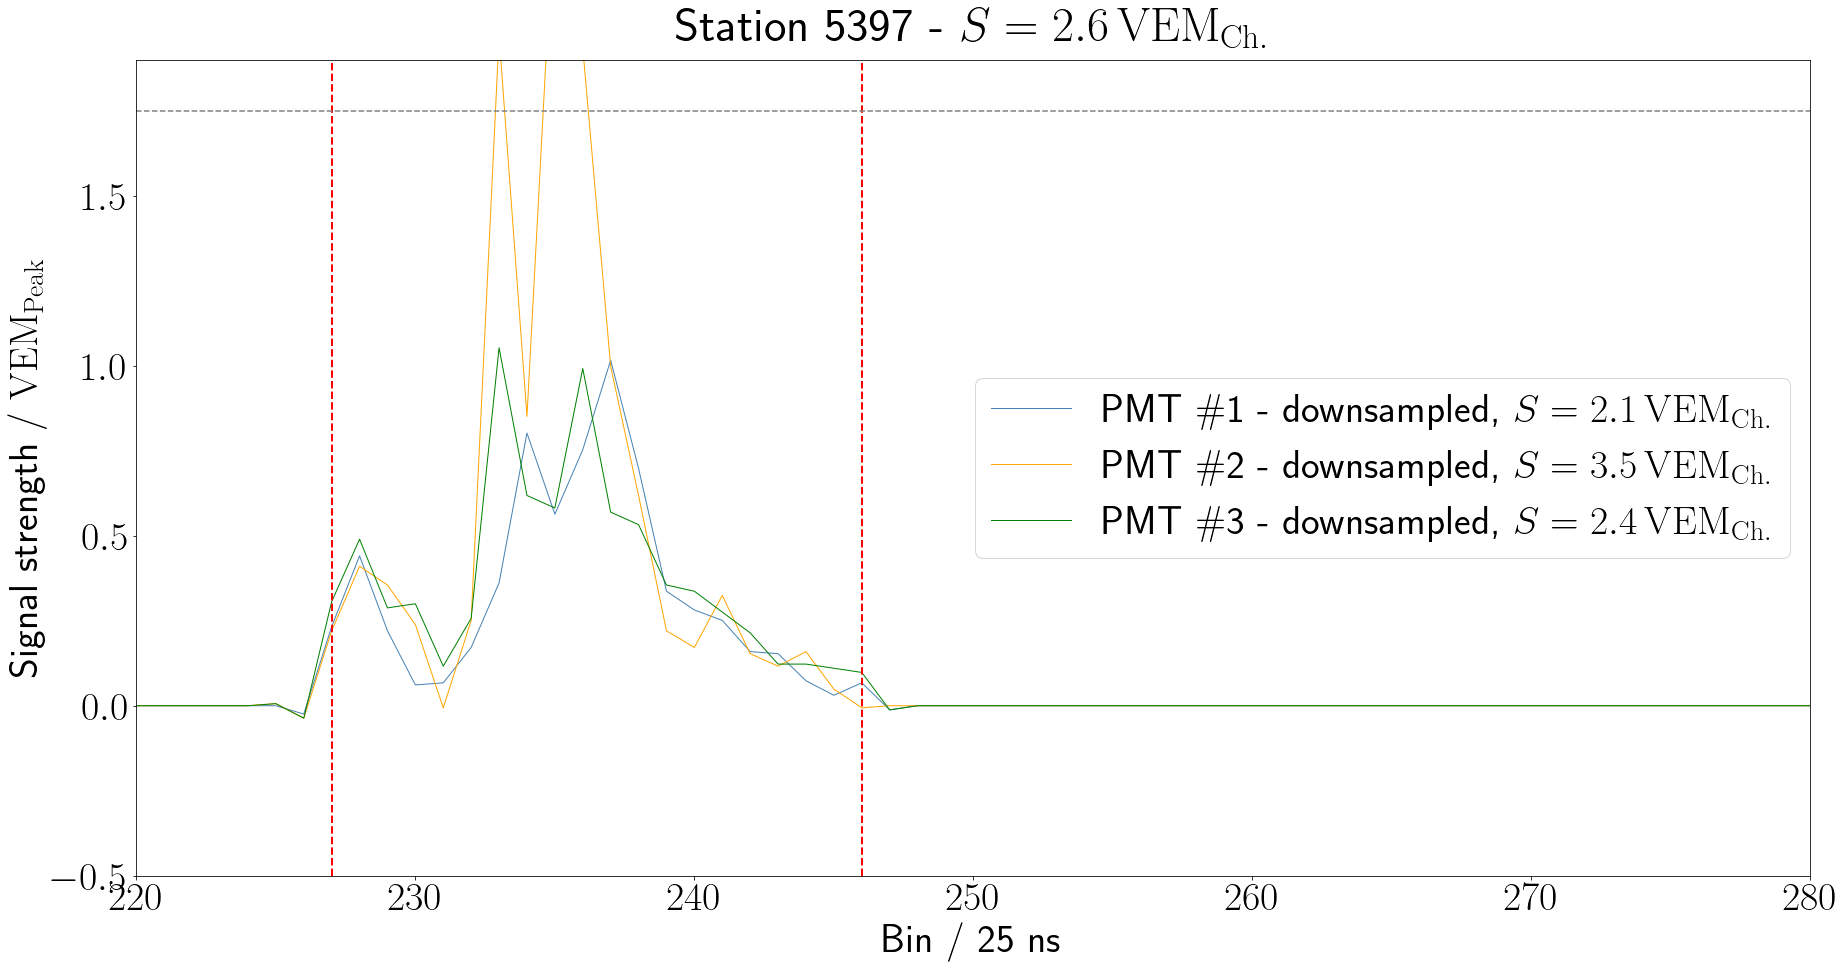

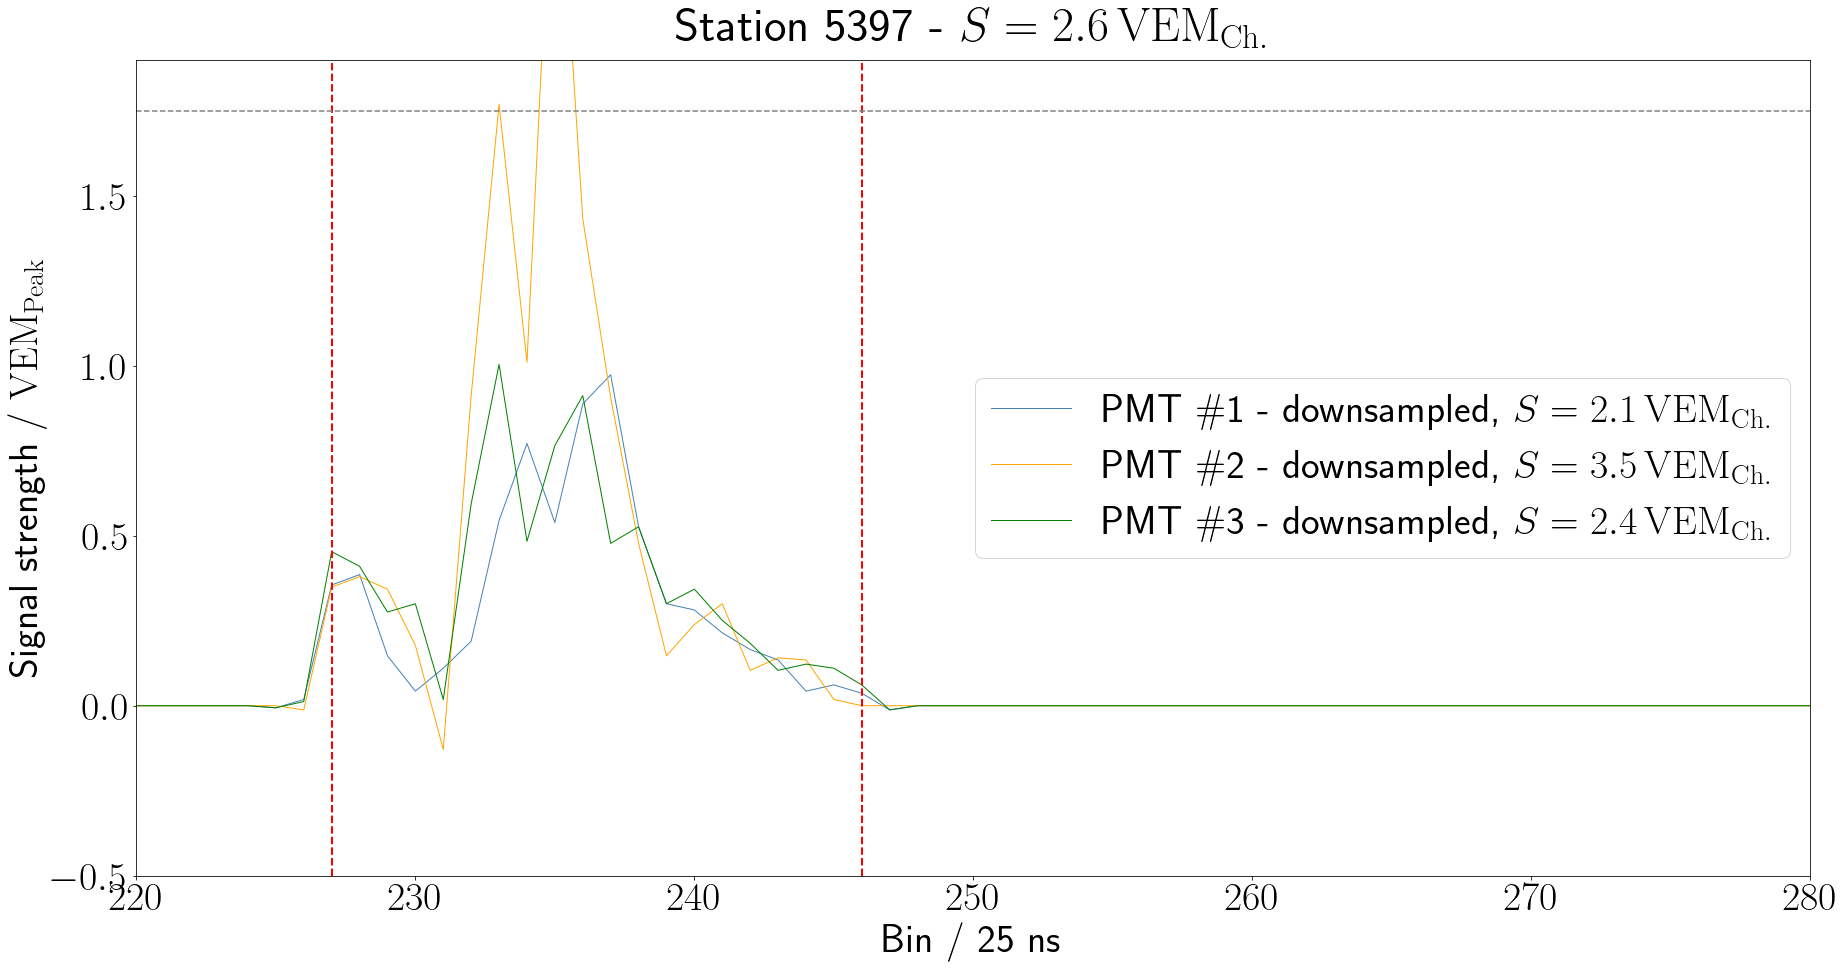

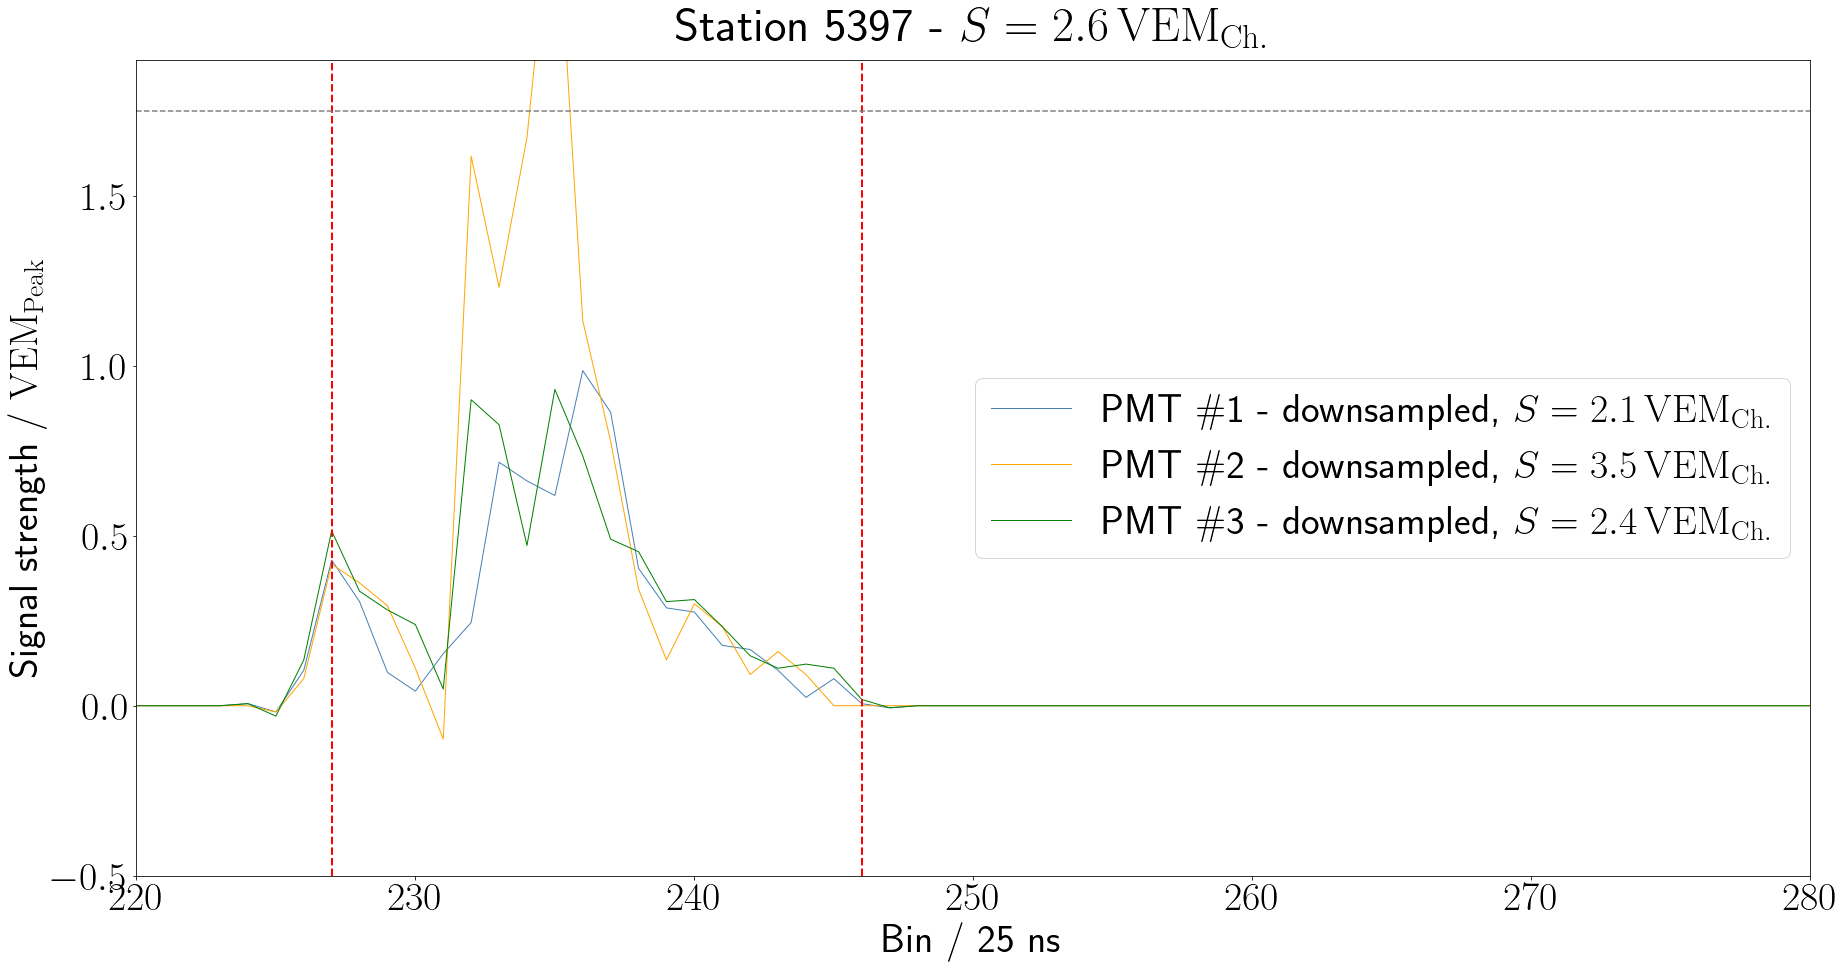

In [7]:
for i, (ID, file) in enumerate(total_fuckups):

    # first Th1 shouldn't have been a T1 in Offline????
    # second Th1 shouldn't have been a T1 in Offline????
    # third one I have no idea wtf is going on

    if i <= 1: continue
    print(ID, file)

    signal_data = SignalBatch(file)

    for station in signal_data:
        if station[0][0] != ID: continue

        baseline = EventsLTP.build_baseline()

        for i in range(3):
            VEMTrace = Trace(baseline, station, EventsLTP.trace_options, file, random_phase = i)

            plt.figure()
            plt.ylim(-0.5,1.9)
            VEMTrace.__plot__()
            plt.xlim(220, 280)

            plt.axhline(1.75, c = "gray", ls = "--")

        raise StopIteration

In [ ]:
print(VEMTrace.StationID, VEMTrace.EventFile)

In [ ]:
mask = EventsLTP.trace_options
mask['apply_downsampling'] = False

VEMTraceNonDownsampled = Trace(baseline, station, mask, file, random_phase = i)

In [ ]:
VEMTraceNonDownsampled.__plot__()
plt.axhline(1.75, c = "gray", ls = "--")
plt.xlim(220*3, 280*3)

/cr/tempdata01/filip/QGSJET-II/LTP/extracted/DAT769322_000001.csv

wtf